<a href="https://colab.research.google.com/github/EnoiuDiana/Stroke-Predictor/blob/bori_dev/Stroke_Predictor_ML_Only.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Stroke Prediction based on medical and demographical data

## Problem Statement

This project is aimed to help to **decide whether a person is likely to get a stroke**, based on demographical and medical data.

Thus, we framed the problem as a **classification problem**: we intend to tell only whether someone is likely or not to get a stroke, we do not try to precisely predict the likelihood of a stroke.



### Background: what is a Stroke?

([source 1: NHS](https://www.nhs.uk/conditions/stroke/#:~:text=A%20stroke%20is%20a%20serious,damage%20is%20likely%20to%20happen.))

([source 2: CDC](https://www.cdc.gov/stroke/index.htm#:~:text=Stroke%20is%20a%20leading%20cause,of%20serious%20disability%20for%20adults.&text=About%20795%2C000%20people%20in%20the%20United%20States%20have%20a%20stroke%20each%20year.&text=Get%20more%20quick%20facts%20about,Stroke%20is%20preventable.))

A stroke is the event in which the flow of blood to a part of the brain is cut off, thus causing the brain cells to get demaged or die. The effects may include a permanent brain demage, long-term disabilities or even death. 

The direct cause of a stroke is generally a blood clot / a piece of fatty material, blocking an artery (Ischaemic stroke), or the walls of a blood vessel in the brain becoming weak and burst (Haemorrhagic stroke).

It is one of the leading death causes and requires urgent treatment. It is reported to cause almost 800 000 deaths each year in the USA.

### Why our analysis is relevant?

The good thing about strokes is that they're somewhat **preventable** with a healthy lifestyle and also **treatable**, if the patient gets the treatment in time.

**Our analysis will focus on the prevention: we try to understand what life-style choises help to reduce one's exposure to stroke.**

## Data Fetching



*   [source](https://https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset)

**The structure of the dataset**

*   each entry represents one person
*   **label**, to be predicted: boolean variable 'stroke', that tells whether a person is likely to have a stroke
*   **features**, to rely on for the prediction:
  * demographical 
      * *gender* : male, female or other
      * *age*
      * *marital status (ever_married)* : was the person ever married?
      * *work type (work_type)* : children, government job ('Govt_job'), never worked ('never_worked'), private, self-employed
      * *residence (residence_type)* : urban or rural
      * *smoking status* : 'never smoked', 'formerly smoked', 'smokes', 'unknown'
   * medical data
      * *hypertension*: 0, if the patient doesn't have hypertension, 1 otherwise
      * *heart disease (heart_disease)* : 0 if the patient doesn't have any heart disease, 1 otherwise
      * *average blood glucose level (avg_glucose_level)*
      * *body mass index (bmi)*



As expected, the dataset contains the labels as well. Stroke prediction based on demographic and medical data seems much better suited for **supervised learning** indeed, because we would not expect to find a clear separation between people with and without a stroke that could be easily found by a clustering algorithm.

On the other hand, it seems promising to analyse time series representing purely medical data about the patients, such as the blood pressure, cholesterol level, ecg, ..., and try to detect anomalies relying on unsupervised learning algorithms in these time series to predict a stroke.

Note that these two approaches are both feasible but could be used for entirely different purposes:


*   our supervised-learning approach based on medical and demographical data helps to find what lifestyle helps to prevent a stroke
*   a time-series based unsupervised anomaly detection might help to detect the early signs of a stroke and ensure that the patient gets the necessary treatment as soon as possible, thus minimizing the effects of a stroke



## Setup

In [397]:
# imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import math
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import FunctionTransformer
from sklearn_pandas import DataFrameMapper
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.base import BaseEstimator, ClassifierMixin, TransformerMixin
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import *
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import GridSearchCV
import sys
import warnings

In [398]:
def_plot_length = 7
def_fig_size = (def_plot_length, def_plot_length)
def_title_size = 20
random_state = 42

### Data Gathering

In [399]:
file_path = "https://drive.google.com/file/d/1x3Vu2Egi5LIvd0jkHnZKeBx-Ye0l8sTr/view?usp=sharing"
file_path ='https://drive.google.com/uc?id=' + file_path.split('/')[-2]
stroke_df = pd.read_csv(file_path)

In [400]:
stroke_df = stroke_df.rename(str.lower, axis='columns')
stroke_df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


### Train-Test Split

We split the dataset such that the ratio of those with a stroke is preseved in both parts.

*   **stroke_df**: dataframe used for training and validation
*   **stroke_test_df**: dataframe used for testing. Not used in the decision processer related to model training



In [401]:
X = stroke_df.drop(columns=['stroke'])
y = stroke_df.stroke

In [402]:
X_stroke_tv_df, X_stroke_test_df, y_stroke_tv_df, y_stroke_test_df = train_test_split(X, y, test_size=0.2, random_state=random_state, stratify=y)

In [403]:
X_stroke_tv_df.shape

(4088, 11)

In [404]:
X_stroke_test_df.shape

(1022, 11)

In [405]:
stroke_df = pd.concat([X_stroke_tv_df, y_stroke_tv_df], axis = 1)
stroke_df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,residence_type,avg_glucose_level,bmi,smoking_status,stroke
845,25283,Female,48.0,0,0,Yes,Private,Urban,69.21,33.1,never smoked,0
3744,43734,Male,15.0,0,0,No,Private,Rural,122.25,21.0,never smoked,0
4183,47113,Female,67.0,0,0,Yes,Self-employed,Rural,110.42,24.9,never smoked,0
3409,56996,Male,44.0,0,0,Yes,Private,Urban,65.41,24.8,smokes,0
284,26325,Male,14.0,0,0,No,Govt_job,Urban,82.34,31.6,Unknown,0


In [406]:
stroke_test_df = pd.concat([X_stroke_test_df, y_stroke_test_df], axis = 1)

In [407]:
print("Stroke ratio in train-test dataframe: ", stroke_df[stroke_df.stroke == 1].shape[0] / stroke_df.shape[0])

Stroke ratio in train-test dataframe:  0.04867906066536203


In [408]:
print("Stroke ratio in train-test dataframe: ", stroke_test_df[stroke_test_df.stroke == 1].shape[0] / stroke_test_df.shape[0])

Stroke ratio in train-test dataframe:  0.04892367906066536


--> the train+validation and the test datasets are well balanced regarding the ratio of people who had stroke

## Data Preprocessing

### Building a Preprocessing Pipeline

The pipeline performs cleaning based on the approaches found above, and, additionaly, encodes the categorical variables.

#### Dropping outliers

In [409]:
class OutlierDropper(BaseEstimator, TransformerMixin):
    def __init__(self):
        super().__init__()

    def fit(self, df, y=None):
        return self

    def transform(self, df, y=None):
        self.__drop_unknown_genders(df)
        self.__drop_bmi_outliers(df)

        return df
    
    def __drop_unknown_genders(self, df):
        df.drop(df[df['gender'] == 'Other'].index, inplace=True)

    def __drop_bmi_outliers(self, df):
        df.drop(df[df['bmi'] > 60].index, inplace=True)

#### Dropping irrelevant columns

In [410]:
class ColumnDropperTransformer():
    def __init__(self,columns):
        self.columns=columns

    def fit(self, X, y=None):
        return self 

    def transform(self,X,y=None):
        return X.drop(self.columns,axis=1)

#### Categorical variables

In [411]:
bin_categorical_cols = ['ever_married', 'residence_type', 'gender']
larger_categorical_cols = [cname for cname in stroke_df.columns if stroke_df[cname].dtype == "object" and cname not in bin_categorical_cols]
larger_categorical_cols

['work_type', 'smoking_status']

Based on the values of these variables, we can see that 'gender', 'ever_married' and 'residence_type' have just two possible values, so it's safe to assume an ordering between them, and assign 1 to one of the values and 0 to the other. This can be easily done using an OrdinalEncoder.

The other variables, 'work_type' and 'smoking_status' have multiple possible values with no ordering between them so we should apply a OneHotEncoder instead.

In [412]:
cat_var_transformers = [
    ('multi_cat', OneHotEncoder(), larger_categorical_cols),
    ('bin_cat', OrdinalEncoder(), bin_categorical_cols),
]

#### Numerical Variables

We only expect to have missing values in the BMI feature. As discussed above, a SimpleImputer with a median strategy is the most promising for BMI values, and for simplicity, we'll apply the same imputer for the other numerical columns as well.

In [413]:
# Select numerical columns
numerical_cols = [cname for cname in stroke_df.columns if stroke_df[cname].dtype in ['int64', 'float64']]
numerical_cols.remove('stroke')
numerical_cols.remove('id')
numerical_cols

['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi']

In [414]:
num_var_transformers = [
    ('num_var', SimpleImputer(strategy='median'), numerical_cols)
]

#### ColumnTransformer integrating categoric and numeric variables

In [415]:
column_transformer = ColumnTransformer(
    transformers = cat_var_transformers + num_var_transformers,
    remainder = 'passthrough'
)

#### Resetting Feature Names of dataframe after ColumnTransformer

In [416]:
class ColumnTransformerFeatureNameResetter(BaseEstimator, TransformerMixin):
    def __init__(self, renamer_column_transformer, init_df_columns):
        super().__init__()
        self.__renamer_column_transformer = renamer_column_transformer
        self.__init_df_columns = init_df_columns
        self.__columns = None

    def fit(self, df, y=None):
        return self

    def transform(self, df, y=None):

        df = pd.DataFrame(df)

        df.columns = self.__get_columns_from_transformer(self.__renamer_column_transformer, self.__init_df_columns)

        self.__columns = df.columns

        df[df.columns] = df[df.columns].apply(pd.to_numeric, errors='coerce')

        return df

    def get_columns(self):
        return self.__columns

    def __get_columns_from_transformer(self, column_transformer, input_colums):    
        """
        source: https://github.com/scikit-learn/scikit-learn/issues/12525#issuecomment-744424900
        """
        col_name = []

        for transformer_in_columns in column_transformer.transformers_[:-1]: #the last transformer is ColumnTransformer's 'remainder'
            raw_col_name = transformer_in_columns[2]
            if isinstance(transformer_in_columns[1],Pipeline): 
                transformer = transformer_in_columns[1].steps[-1][1]
            else:
                transformer = transformer_in_columns[1]
            try:
                names = transformer.get_feature_names_out(raw_col_name)
            except AttributeError: # if no 'get_feature_names' function, use raw column name
                names = raw_col_name
            if isinstance(names,np.ndarray): # eg.
                col_name += names.tolist()
            elif isinstance(names,list):
                col_name += names    
            elif isinstance(names,str):
                col_name.append(names)

        [_, _, reminder_columns] = column_transformer.transformers_[-1]

        for col_idx in reminder_columns:
            col_name.append(input_colums[col_idx])

        return col_name

#### Custom Transformers

In [417]:
class WorkTypeTransformer(BaseEstimator, TransformerMixin):
    def __init__(self):
        super().__init__()

    def fit(self, df, y=None):
        return self

    def transform(self, df, y=None):
        df['work_type'] = df.apply(
            lambda row: "children" if ((row['work_type'] == 'Never_worked') & (row['age'] < 18)) else row['work_type'],
            axis=1
        )

        return df

In [418]:
class SmokingStatusTransformer(BaseEstimator, TransformerMixin):
    def __init__(self):
        super().__init__()

    def fit(self, df, y=None):
        return self

    def transform(self, df, y=None):
        df.smoking_status = np.where(np.logical_and(df.age < 10, df.smoking_status == 'Unknown'), "never smoked", df.smoking_status)

        return df

#### Scaling Values

It is known that most ML algorithms perform better if the features have similar scales, as it is the case in out dataframe: for example, BMI values have the range [0, 60], whereas avg_glucose_level values are in the interval [50, 270]. 

To overcome this issue, we should scale all the values. Since many of our variables do not follow a normal distribution but are rather skewed (see BMI - right skewed, or avg_glucose_level - doubles peaked), and we have many binary-values nominal variables as well marked with 0 or 1, we should use the MinMaxScaler instead of the StandardScaler.

In [419]:
scaler = MinMaxScaler()

In [420]:
class ScalerFeatureNameResetter(BaseEstimator, TransformerMixin):
    def __init__(self, renamer_scaler, init_cols):
        super().__init__()
        self.__renamer_scaler = renamer_scaler
        self.__init_cols = init_cols

    def fit(self, df, y=None):
        return self

    def transform(self, df, y=None):

        df = pd.DataFrame(df)

        df.columns = self.__renamer_scaler.get_feature_names_out(self.__init_cols)
        return df

#### Integrating all steps in a pipeline

In [421]:
processed_columns = stroke_df.drop(['id'], axis=1).columns
column_transformer_name_resetter = ColumnTransformerFeatureNameResetter(column_transformer, processed_columns)
processed_columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [422]:
preprocesser_pipeline = Pipeline([
        ('drop_irrelevant_features', ColumnDropperTransformer("id")),
        ('drop_outliers', OutlierDropper()), 
        ('work_type_replacement_for_children', WorkTypeTransformer()), 
        ('smoking_status_replacement_for_small_children', SmokingStatusTransformer()), 
        ('column_processing', column_transformer),
        ('reset_feature_names', column_transformer_name_resetter),
        ('scaling', scaler),
        ('reset_scaled_feature_names', ScalerFeatureNameResetter(scaler, column_transformer_name_resetter.get_columns()))
])

In [423]:
stroke_df = pd.DataFrame(preprocesser_pipeline.fit_transform(stroke_df))
stroke_df

,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,ever_married,residence_type,gender,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.584961,0.0,0.0,0.065045,0.461538,0.0
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.182129,0.0,0.0,0.309898,0.216599,0.0
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.816895,0.0,0.0,0.255286,0.295547,0.0
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.536133,0.0,0.0,0.047503,0.293522,0.0
4,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.169922,0.0,0.0,0.125658,0.431174,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4069,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.548340,0.0,0.0,0.174222,0.502024,0.0
4070,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.194336,0.0,0.0,0.269366,0.186235,0.0
4071,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.743652,0.0,0.0,0.108623,0.524291,0.0
4072,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.377441,0.0,0.0,0.087388,0.317814,0.0


In [424]:
test_stroke_df = pd.DataFrame(preprocesser_pipeline.fit_transform(stroke_test_df))
test_stroke_df

,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,ever_married,residence_type,gender,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.768066,0.0,0.0,0.108170,0.491266,0.0
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.523926,0.0,0.0,0.147916,0.458515,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.279785,0.0,0.0,0.336284,0.358079,0.0
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.255371,0.0,0.0,0.720085,0.275109,0.0
4,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.816895,0.0,0.0,0.273511,0.305677,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.000000,0.0,0.0,0.126913,0.299127,0.0
1018,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.414062,0.0,0.0,0.305157,0.451965,0.0
1019,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.609375,0.0,0.0,0.173723,0.185590,0.0
1020,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.182129,0.0,0.0,0.034424,0.436681,0.0


## Building a Predictive Model

### Splitting the Features and the Label

In [425]:
X_train = stroke_df.drop(columns=['stroke'])
y_train = stroke_df.stroke
X_test = test_stroke_df.drop(columns=['stroke'])
y_test = test_stroke_df.stroke

In [426]:
X = pd.concat([X_train, X_test], axis = 0)

In [427]:
y = pd.concat([y_train, y_test], axis = 0)

### Train-Validation Split

Since our dataset is quite small, we should prefer performing a cross validation whenever possible. However, when training a model is computationally expensive, we may use the below train-validation split to evaluate our model.

In [428]:
X_train1, X_valid1, y_train1, y_valid1 = train_test_split(X, y, test_size=0.2, random_state=random_state, stratify=y)

### Expectations from the Model

Since the model that we build acts as a binary classifier, it it only natural that we rely on the confusion matrix to evaluate our model. 

However, we should decide which confusion-matrix-related metrics is most important for us: **do we care more about precision, i.e. making sure that all people said to have had a stroke by the model indeed had a stroke, or recall, i.e. maximizing the probability that a person who had a stroke is detected by the model as such?** Or maybe should we take both into account, in form of a more complex metrics? It is likely that at some point we'll need to make a compromise, due to the precision-recall tradeoff concept.

In the context of medical analysis, the first intuition may be that the recall should have a higher weight in deciding which model fits best. In general, when it comes to detecting such mortal diseases, **the cost of not detecting someone's tendency to get the disease is likely death**. We generally consider the death of a human being to be a far higher cost compared to the financial costs related to unnecessary medical analysis and preventive treatment. 

There's one mistake in the above train of thought though: note that the goal of our analysis is not that of deciding whether someone needs treatment, surgery, medicines or any other measue to avoid a stroke when they are already close to getting it, rather that of getting an insight into lifestyle choices that may influence one's tendency to get a stroke. In this context, we want to give the readers a picture as accurate as possible. 


*   *if we focused on precision only*, probably some factors leading to a stroke may be underestimated, causing the readers taking lifestyle choices based on our analysis to be overconfident in the healthiness of their lifestyle
*   *if we considered recall only*, the opposite may happen, some factors leading to stroke are likely to be overestimated, causing the people to take otherwise painful decisions in order to avoid a stroke (such as changing a job, restricting themselves a healthier, but less enjoyable diet, ...)

**Thus, we should use a metric that combines recall and precision. Such a metric is the F1-score, the harmonic mean of recall and precision.**

Additionally, it may help us to compare models or to find the best hyperparameters for each model to take a look at the **Precision/Recall-curve**. 

We may take into account the ROC curve as well, but it was shown that it is not a good indicator in case the input dataset is highly unbalanced. As we only have 5% of the entries with a positive 'stroke' label, we should stick to the Precision/Recall-curve instead.

In [429]:
def plot_confusion_matrix_with_percentages(cf_matrix, title='Confusion Matrix'):
  ax = sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, 
            fmt='.2%', cmap='Blues')

  ax.set_title(title, fontsize=def_title_size);
  ax.set_xlabel('\nPredicted Values')
  ax.set_ylabel('Actual Values ');

  ## Ticket labels - List must be in alphabetical order
  ax.xaxis.set_ticklabels(['False','True'])
  ax.yaxis.set_ticklabels(['False','True'])

  ## Display the visualization of the Confusion Matrix.
  plt.show()

In [430]:
def print_metrics(y_true, y_pred):
  print("Precision: ", precision_score(y_true, y_pred))
  print("Recall: ", recall_score(y_true, y_pred))
  print("F1 score: ", f1_score(y_true, y_pred))

In [431]:
def plot_precision_recall_curve(y_true, y_pred_score):
  #calculate precision and recall
  precision, recall, thresholds = precision_recall_curve(y_true, y_pred_score)

  #create precision recall curve
  fig, ax = plt.subplots()
  ax.plot(recall, precision, color='purple')

  #add axis labels to plot
  ax.set_title('Precision-Recall Curve', fontsize=def_title_size)
  ax.set_ylabel('Precision')
  ax.set_xlabel('Recall')

  #display plot
  plt.show()

### Experiments with Logistic Regression Models

#### Simple Logistic Regression

In [432]:
log_reg = LogisticRegression(random_state=random_state)
log_reg.fit(X_train1, y_train1)

LogisticRegression(random_state=42)

In [433]:
print("Accuracies obtained with LogisticRegression using 5-fold cross-validation")
scores = cross_val_score(log_reg, X_train, y_train, cv = 5)
print(scores)

Accuracies obtained with LogisticRegression using 5-fold cross-validation
[0.95092025 0.95092025 0.95092025 0.95092025 0.95208845]


In [434]:
mean_score = scores.mean()
print("Mean Accuracy: ", mean_score)

Mean Accuracy:  0.9511538867367089


At first sight, obtaining a 95.1% accuracy seems truly promising. But, if we take a closer look at the data, it's in fact highly disappointing, given that only 4.86% of our labels have a positive value. This means, that even a model which would have predicted stroke=0 for all entries would have reached a very similar accuracy.

We should take a look at the precision and recall metrics to understand better the results produced by this model.

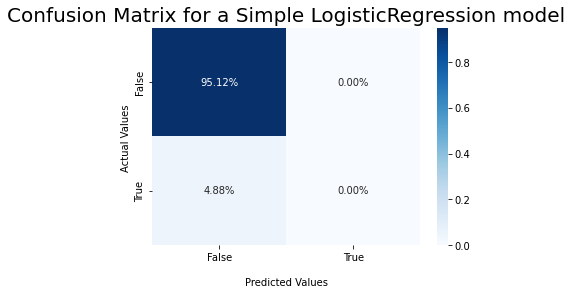

In [435]:
y_pred = cross_val_predict(log_reg, X_train, y_train, cv=5)
conf_mat = confusion_matrix(y_train, y_pred)
plot_confusion_matrix_with_percentages(conf_mat, "Confusion Matrix for a Simple LogisticRegression model")

In [436]:
print("Precision: ", precision_score(y_train, y_pred))
print("Recall: ", recall_score(y_train, y_pred))

Precision:  0.0
Recall:  0.0


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Unfortunately, this confusion matrix confirms what we have been worrying about: **this simple LogisticRegression simply classifies all entries as 'stroke=0'. This is certainly not what we wanted!**

The primary reason for this error is the fact that our dataset is **highly unbalanced.** As a workaround, we may try to artificially assign higher weights to the minority class (stroke=1), that we are trying to predict.

#### Weighted Logistic Regression

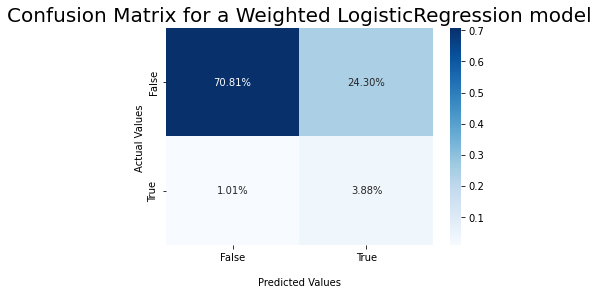

Precision:  0.13763066202090593
Recall:  0.7939698492462312
F1 score:  0.23459539717891612


In [437]:
w = {0:5, 1:95}
weighted_log_reg = LogisticRegression(random_state=random_state, class_weight=w, max_iter=1000, tol=1e-6)
y_pred = cross_val_predict(weighted_log_reg, X_train, y_train, cv=5)
conf_mat = confusion_matrix(y_train, y_pred)
plot_confusion_matrix_with_percentages(conf_mat, "Confusion Matrix for a Weighted LogisticRegression model")
print_metrics(y_train, y_pred)

The improvement is fascinating: although the precision is still quite low, a recall 0f 0.79 is actually quite promising. This means that the model detects the people who had a stroke quite well, but it additionally predicts lots of other people to have a stroke too. 

This result suggests that this time the weight of the minority class was in fact too hight. We should ask ourselves the question: can we find a parameter for the class weights that allows us to balance the precision and the recall?

Let's use grid-search to find that out!

##### Grid-Search for finding the appropriate class weights

In [438]:
class1_weights = np.arange(0, 46, 3)
class2_weights = 100 - class1_weights
weight_pairs = list(zip(class1_weights, class2_weights))
weight_pairs_spec = []
for weight0, weight1 in weight_pairs:
  weight_pairs_spec.append({0: weight0, 1: weight1})
weight_pairs_spec

[{0: 0, 1: 100},
 {0: 3, 1: 97},
 {0: 6, 1: 94},
 {0: 9, 1: 91},
 {0: 12, 1: 88},
 {0: 15, 1: 85},
 {0: 18, 1: 82},
 {0: 21, 1: 79},
 {0: 24, 1: 76},
 {0: 27, 1: 73},
 {0: 30, 1: 70},
 {0: 33, 1: 67},
 {0: 36, 1: 64},
 {0: 39, 1: 61},
 {0: 42, 1: 58},
 {0: 45, 1: 55}]

In [439]:
weighted_log_reg = LogisticRegression(random_state=random_state, max_iter=1000, tol=1e-6)
grid_values = {'class_weight': weight_pairs_spec}
grid_weighted_log_reg = GridSearchCV(weighted_log_reg, cv = 3, param_grid = grid_values, scoring = ['f1', 'recall', 'precision'], refit='f1', return_train_score=True)
grid_weighted_log_reg.fit(X_train1, y_train1)

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


GridSearchCV(cv=3,
             estimator=LogisticRegression(max_iter=1000, random_state=42,
                                          tol=1e-06),
             param_grid={'class_weight': [{0: 0, 1: 100}, {0: 3, 1: 97},
                                          {0: 6, 1: 94}, {0: 9, 1: 91},
                                          {0: 12, 1: 88}, {0: 15, 1: 85},
                                          {0: 18, 1: 82}, {0: 21, 1: 79},
                                          {0: 24, 1: 76}, {0: 27, 1: 73},
                                          {0: 30, 1: 70}, {0: 33, 1: 67},
                                          {0: 36, 1: 64}, {0: 39, 1: 61},
                                          {0: 42, 1: 58}, {0: 45, 1: 55}]},
             refit='f1', return_train_score=True,
             scoring=['f1', 'recall', 'precision'])

In [440]:
print(f'Best f1 score: {grid_weighted_log_reg .best_score_} with param: {grid_weighted_log_reg .best_params_}')

Best f1 score: 0.26108819721925114 with param: {'class_weight': {0: 9, 1: 91}}


In [441]:
results = pd.DataFrame(grid_weighted_log_reg.cv_results_)
results[['mean_test_f1', 'mean_test_recall', 'mean_test_precision', 'params']].round(3)

,mean_test_f1,mean_test_recall,mean_test_precision,params
0,0.093,1.000,0.049,"{'class_weight': {0: 0, 1: 100}}"
1,0.206,0.869,0.117,"{'class_weight': {0: 3, 1: 97}}"
2,0.242,0.734,0.145,"{'class_weight': {0: 6, 1: 94}}"
3,0.261,0.613,0.167,"{'class_weight': {0: 9, 1: 91}}"
4,0.246,0.467,0.168,"{'class_weight': {0: 12, 1: 88}}"
5,0.212,0.331,0.158,"{'class_weight': {0: 15, 1: 85}}"
6,0.210,0.261,0.180,"{'class_weight': {0: 18, 1: 82}}"
7,0.201,0.215,0.197,"{'class_weight': {0: 21, 1: 79}}"
8,0.199,0.180,0.238,"{'class_weight': {0: 24, 1: 76}}"
9,0.170,0.135,0.246,"{'class_weight': {0: 27, 1: 73}}"


###### Evaluation on the validation set

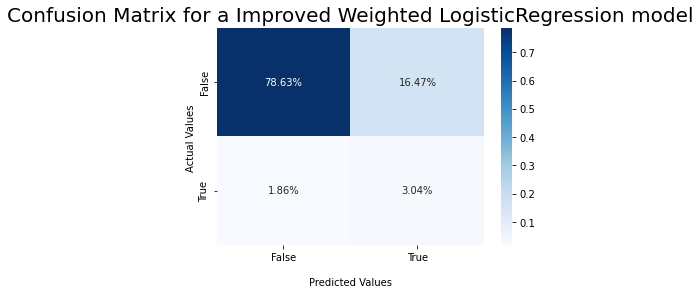

Precision:  0.15577889447236182
Recall:  0.62
F1 score:  0.248995983935743


In [442]:
y_pred = grid_weighted_log_reg.predict(X_valid1)
conf_mat = confusion_matrix(y_valid1, y_pred)
plot_confusion_matrix_with_percentages(conf_mat, "Confusion Matrix for a Improved Weighted LogisticRegression model")
print_metrics(y_valid1, y_pred)

Indeed, by setting the weight of the minority class slightly lower, we obtained a better result. However, we still cannot be satisfied with the precision of this model. Let's take a look at the precision-recall curve to see whether we could find a better compromise between the precision and the recall.

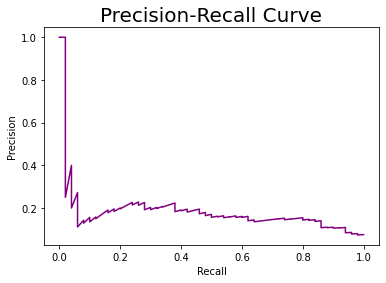

In [443]:
y_score_pred = grid_weighted_log_reg.predict_proba(X_valid1)[:, 1]

plot_precision_recall_curve(y_valid1, y_score_pred)

The curve has a very unsatisfying shape: we would expect it to be close to the upper-right corner, but in reality there's no decision threshold for which both the precision and the recall would be acceptably high. 

#### Conclusions about the Logistic Regression

To sum op our experiments with Logistic Regression models, we can simply say that none of them provided good enough results. 


Before taking the next steps, we should think about why the LogisticRegression performed so badly. To answer this question, we should dive deeper into the working mechanism of the logistic regression models: they estimate the probability of an entry belonging to a certain class by applying the sigmoid function to a weighted linear combination of the features. **The key here is that it cannot actually learn non-linear relationships between the features and the label.** Knowing that we didn't have any feature in our dataset, which would have been highly correlated (thus showing a strong linear relationship with our label) with the label, it is in fact not surprising that a logistic regression cannot perform well. 

So, as a next step, we should focus on ML models capable of treating non-linear relationships.